In [18]:
## Import libraries & data

In [133]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('InputData/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,"16,884.92"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33.00,3,no,southeast,"4,449.46"
3,33,male,22.70,0,no,northwest,"21,984.47"
4,32,male,28.88,0,no,northwest,"3,866.86"


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [137]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"1,338.00",39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,"1,338.00",30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,"1,338.00",1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,"1,338.00","13,270.42","12,110.01","1,121.87","4,740.29","9,382.03","16,639.91","63,770.43"


In [139]:
 ## Exploratory Analysis

In [140]:
def func(row):
    if row['age'] < 21:
        return 'Children'
    elif row['age'] >21 and row['age']< 61:
        return 'Adult' 
    else:
        return 'senier citi'

df['age_group'] = df.apply(func, axis=1)

In [141]:
cols_w_diff_categories= ['sex', 'children', 'smoker', 'region']
count_of_categories= ['sex', 'region','age_group', ]
cols_w_values= ['age', 'bmi', 'charges']


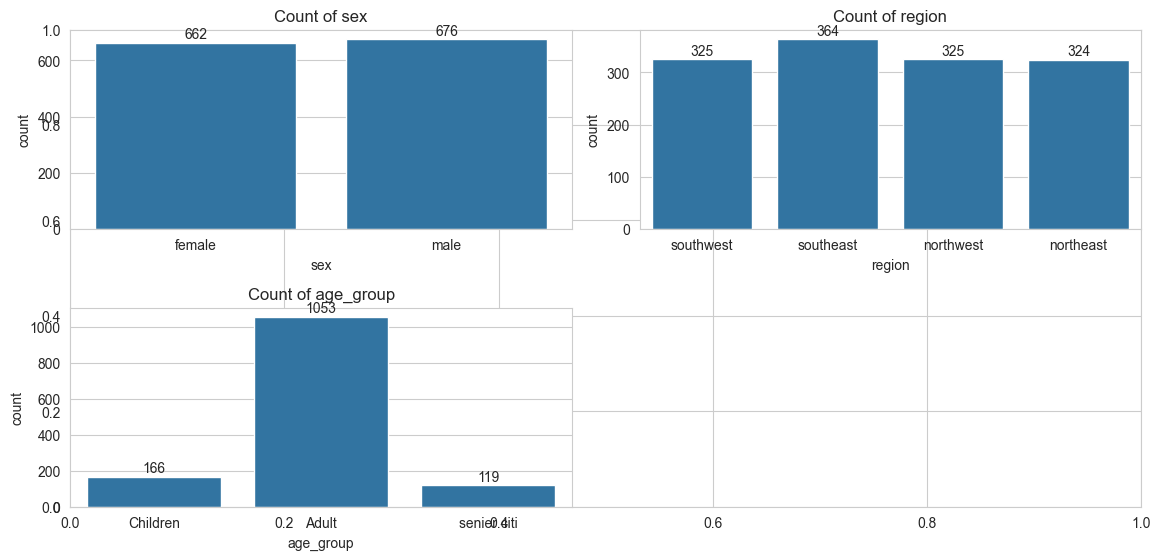

In [143]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(count_of_categories,1):
    
    ax = plt.subplot(2, 2, i)
    
    sns.countplot(x=df[col].astype('object'), ax=ax)
    plt.title(f'Count of {col}')
    
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)
        
    # ax.remove() 

plt.tight_layout()
plt.show()

# Explicitly close the figure to remove overlapping axes
plt.close(fig)

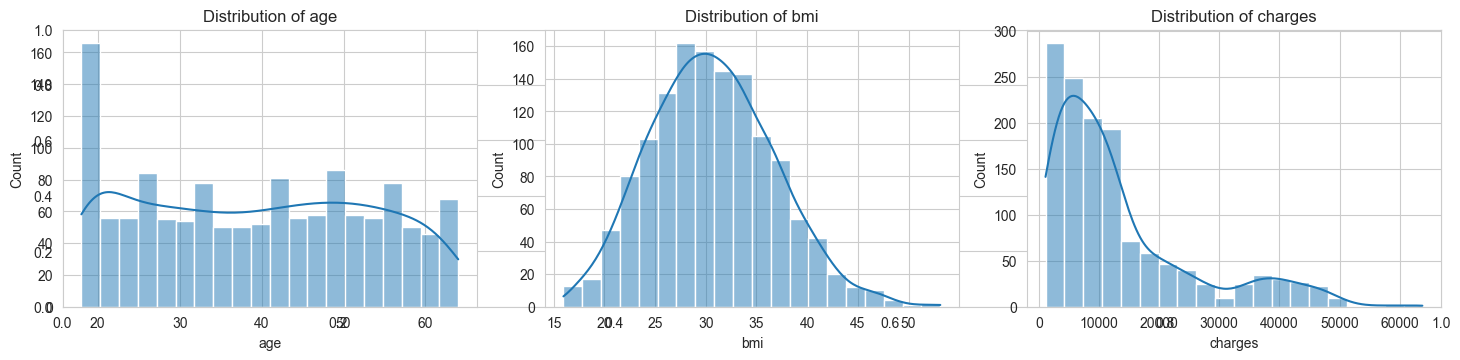

In [131]:
### number of unique elements > 6
fig, ax = plt.subplots(figsize=(15, 4))

for i, col in enumerate(cols_w_values, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [50]:
### For plotting purposes, divide the data into two sets
# number of unique elements <= 6
cols_smaller_than_6 = [col for col in df.columns if df[col].nunique() <= 6]
print(cols_smaller_than_6)

# number of unique elements > 6
cols_greater_than_6 = [col for col in df.columns if df[col].nunique() > 6]
print(cols_greater_than_6)

['sex', 'children', 'smoker', 'region', 'age_group']
['age', 'bmi', 'charges']


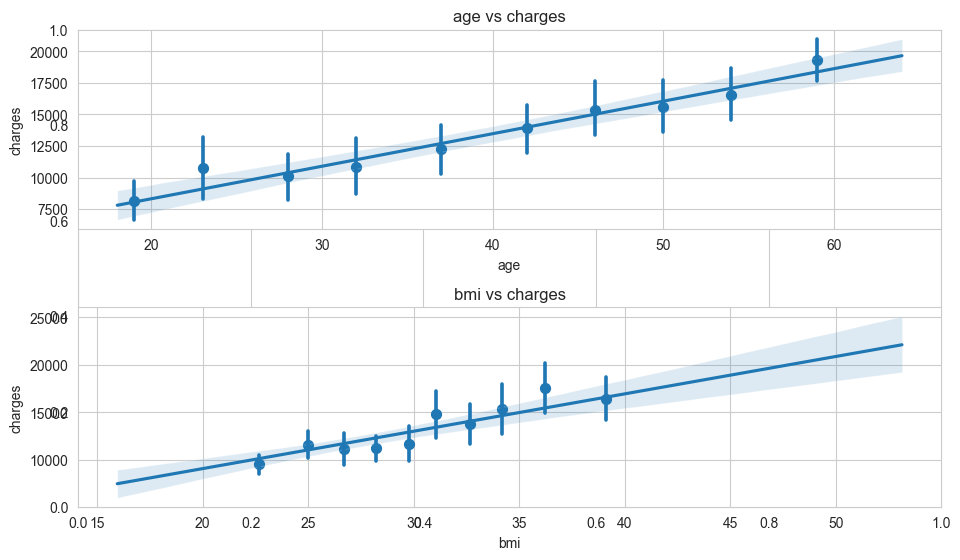

In [ ]:
### number of unique elements > 6
# box plot of 'charges' & other variables
fig, ax = plt.subplots()

charges_vs_categories = [col for col in cols_w_values if col != 'charges']

for i, col in enumerate(charges_vs_categories, 1):
    plt.subplot(2, 1, i)

    ax = sns.regplot(data=df, x=df[col], y='charges', x_bins=10)
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [148]:
## Multi-Variate Analysis

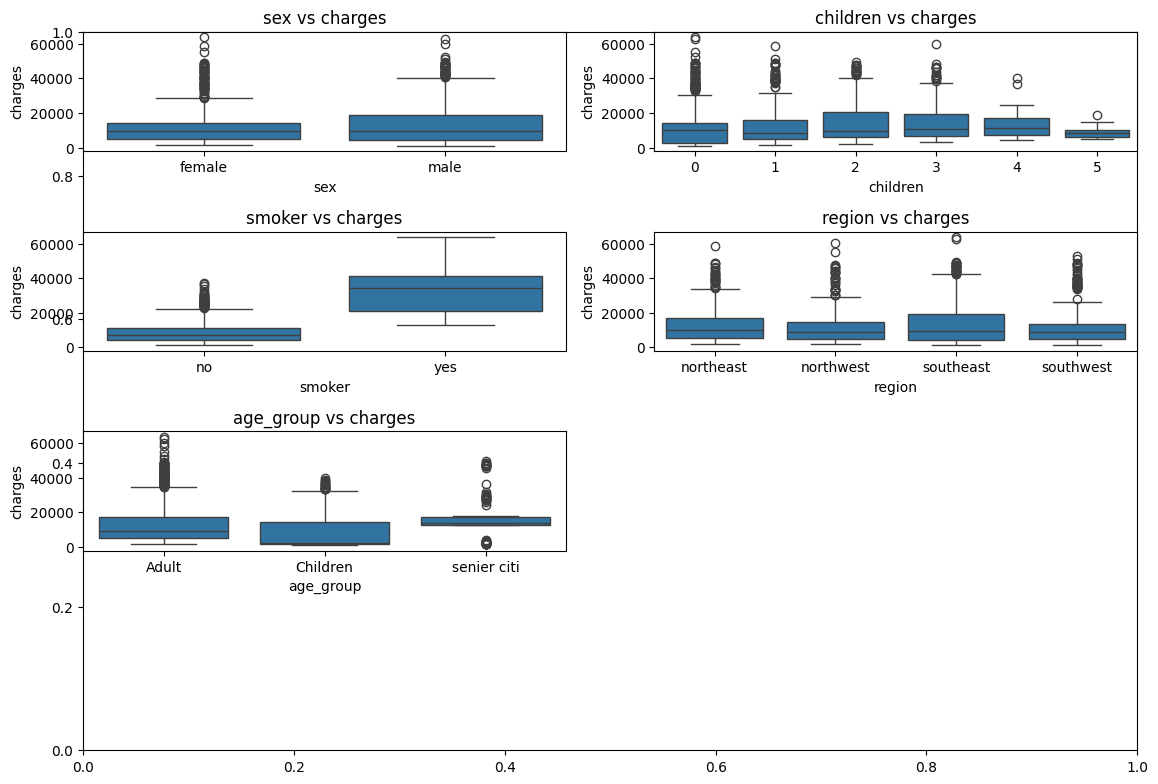

In [87]:
### number of unique elements <= 4
# box plot of 'charges' & other variables
fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(cols_smaller_than_6, 1):
    plt.subplot(4, 2, i)
    
    ax = sns.boxplot(data=df, x=df[col].astype('category'), y='charges')
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [95]:
bins_2 = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
labels_2 = ['1k-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k',]

df['charges_group'] = pd.cut(df.charges, bins_2, labels=labels_2, include_lowest=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,charges_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-29,10k-20k
1,18,male,33.770,1,no,southeast,1725.55230,18-29,1k-5k
2,28,male,33.000,3,no,southeast,4449.46200,18-29,1k-5k
3,33,male,22.705,0,no,northwest,21984.47061,30-39,20k-30k
4,32,male,28.880,0,no,northwest,3866.85520,30-39,1k-5k


In [ ]:

sex_smoker_charges = df.pivot_table(index='sex', columns='smoker', values='charges')
sex_smoker_charges

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


In [158]:
sex_agegroup_charges = df.pivot_table(index='sex', columns='age_group', values='charges')
sex_agegroup_charges

age_group,Adult,Children,senier citi
sex,,,
female,"12,691.49","7,941.88","17,679.18"
male,"14,378.96","9,431.25","16,753.39"


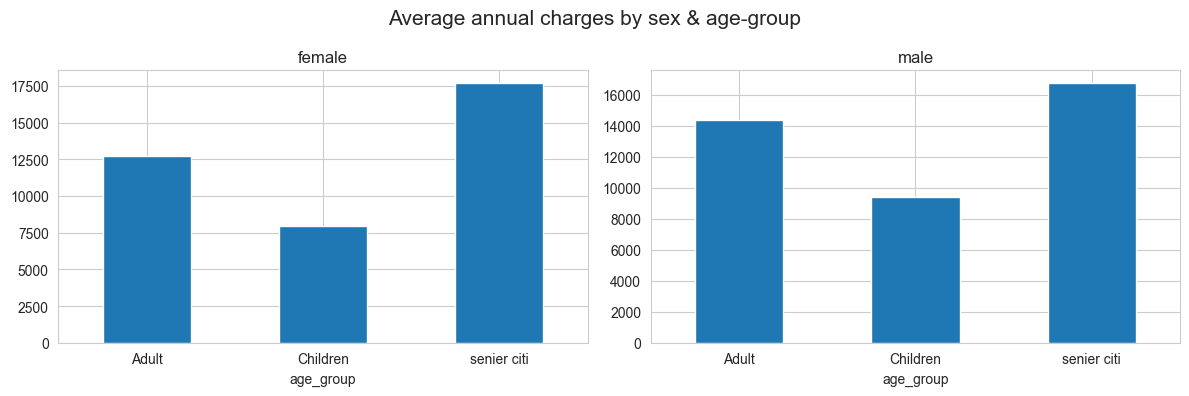

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for ax, agegroup in zip(ax, sex_agegroup_charges.index):
    sex_agegroup_charges.xs(agegroup).plot(kind='bar', rot=0, ax=ax,)
    ax.set_title(agegroup)

plt.suptitle('Average annual charges by sex & age-group', fontsize=15)
plt.tight_layout()